In [83]:
# Importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
import matplotlib.ticker as tick

# view all possible rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import warnings
warnings.filterwarnings('ignore')

# Exploring Data

In [2]:
# read Data
dataset = pd.read_csv("Speed_Dating_Data.csv", encoding= 'unicode_escape')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [3]:
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [4]:
# check columns names
dataset.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [5]:
# check data types
types= dataset.dtypes
types.sort_index()

age         float64
age_o       float64
amb         float64
amb1_1      float64
amb1_2      float64
amb1_3      float64
amb1_s      float64
amb2_1      float64
amb2_2      float64
amb2_3      float64
amb3_1      float64
amb3_2      float64
amb3_3      float64
amb3_s      float64
amb4_1      float64
amb4_2      float64
amb4_3      float64
amb5_1      float64
amb5_2      float64
amb5_3      float64
amb7_2      float64
amb7_3      float64
amb_o       float64
art         float64
attr        float64
attr1_1     float64
attr1_2     float64
attr1_3     float64
attr1_s     float64
attr2_1     float64
attr2_2     float64
attr2_3     float64
attr3_1     float64
attr3_2     float64
attr3_3     float64
attr3_s     float64
attr4_1     float64
attr4_2     float64
attr4_3     float64
attr5_1     float64
attr5_2     float64
attr5_3     float64
attr7_2     float64
attr7_3     float64
attr_o      float64
career       object
career_c    float64
clubbing    float64
concerts    float64
condtn        int64


In [6]:
dataset.shape

(8378, 195)

# Structring and cleaning Data

In [7]:
# Remove the variables that will not be included in the analysis (redundant vars and undergraduate related vars)
#id, idg, condtn, round, position, positin1, order, partner, tuition, undergra, mn_sat
col_to_rem = ['id', 'idg', 'condtn', 'round', 'position', 'positin1', 'order', 'partner', 'tuition', 'undergra', 'mn_sat']
dataset.drop(col_to_rem, inplace = True, axis = 1)
dataset.shape

(8378, 184)

In [8]:
# add a new column 'gender_str' in order to be used as semantic variable in the analysis
dataset["gender_str"] = np.where(dataset["gender"]==1,"Male","Female")
dataset["gender_str"].value_counts()

Male      4194
Female    4184
Name: gender_str, dtype: int64

In [9]:
dataset["gender_str"] = dataset["gender_str"].astype(str)

In [10]:
dataset.shape

(8378, 185)

In [11]:
# check NAN values
dataset.isna().sum()

iid              0
gender           0
wave             0
pid             10
match            0
int_corr       158
samerace         0
age_o          104
race_o          73
pf_o_att        89
pf_o_sin        89
pf_o_int        89
pf_o_fun        98
pf_o_amb       107
pf_o_sha       129
dec_o            0
attr_o         212
sinc_o         287
intel_o        306
fun_o          360
amb_o          722
shar_o        1076
like_o         250
prob_o         318
met_o          385
age             95
field           63
field_cd        82
race            63
imprace         79
imprelig        79
from            79
zipcode       1064
income        4099
goal            79
date            97
go_out          79
career          89
career_c       138
sports          79
tvsports        79
exercise        79
dining          79
museums         79
art             79
hiking          79
gaming          79
clubbing        79
reading         79
tv              79
theater         79
movies          79
concerts    

In [12]:
# check NAN values for the variable 'pid'
dataset.isna().sum()['pid']

10

# Data Analysis
## Univariate Analysis
### Age Distribution

In [13]:
# check if there are missing values
dataset.isna().sum()['age']

95

In [14]:
# most common age of participants
dataset["age"].value_counts()

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: age, dtype: int64

In [15]:
l=dataset['age'].unique().tolist()
l.sort()
l

[18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 nan,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 42.0,
 55.0]

In [16]:
# assign all NaN values in the age column to the average age
dataset["age"] = dataset["age"].fillna(round(dataset["age"].mean(),1))
dataset["age"] = dataset["age"].astype(int)

In [17]:
dataset.isna().sum()['age']

0

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Age Distribution')]

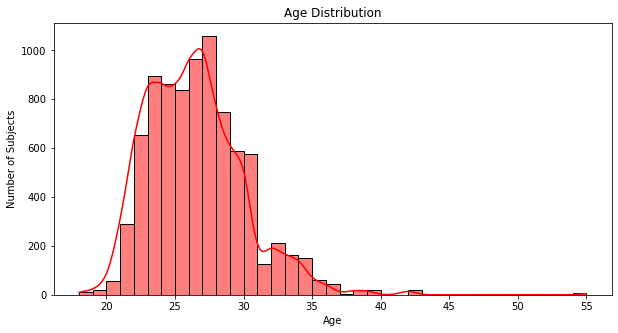

In [18]:
#Age Distribution using Seaborn
plt.figure(figsize=(10, 5))
sns.set_palette('bright')
ax = sns.histplot(dataset['age'], kde=True, binwidth=1, color='r')
ax.set(xlabel="Age", ylabel="Number of Subjects", title="Age Distribution")

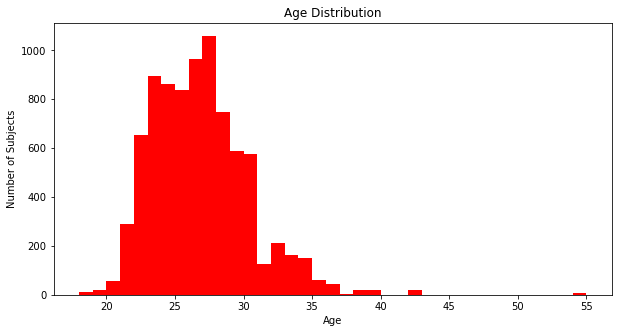

In [19]:
#Age Distribution using Matplotlib
plt.figure(figsize=(10, 5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Subjects")
bins = bins = np.arange(dataset.age.min(),dataset.age.max()+1, 1)
histo = plt.hist(data=dataset, x="age", bins = bins, facecolor = 'r')
plt.show()

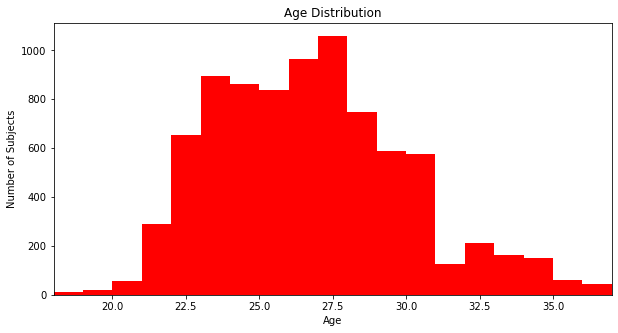

In [20]:
# zooming on age of majority of participants
bins = np.arange(dataset.age.min(),dataset.age.max()+0.5, 1)
plt.figure(figsize=(10, 5))
plt.hist(data=dataset, x="age", bins = bins, color = 'r')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.xlim(18, 37)
plt.ylabel("Number of Subjects")
plt.show()

In [21]:
dataset['age'].describe()

count    8378.000000
mean       26.354858
std         3.546684
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

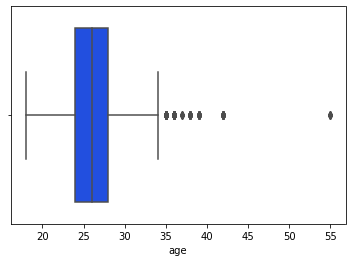

In [22]:
sns.boxplot(dataset['age'])

In [23]:
pd.qcut(dataset['age'], q=4)

0       (17.999, 24.0]
1       (17.999, 24.0]
2       (17.999, 24.0]
3       (17.999, 24.0]
4       (17.999, 24.0]
             ...      
8373      (24.0, 26.0]
8374      (24.0, 26.0]
8375      (24.0, 26.0]
8376      (24.0, 26.0]
8377      (24.0, 26.0]
Name: age, Length: 8378, dtype: category
Categories (4, interval[float64]): [(17.999, 24.0] < (24.0, 26.0] < (26.0, 28.0] < (28.0, 55.0]]

In [24]:
cut_labels = ['18-21', '22-31', '32-55']
cut_bins = [18, 22, 32, 55]
dataset['cut_age'] = pd.cut(dataset['age'], bins=cut_bins, labels=cut_labels)

In [25]:
N = dataset['age'].count()
round((dataset['cut_age'].value_counts()/N)*100, 1)

22-31    81.9
18-21    12.2
32-55     5.8
Name: cut_age, dtype: float64

**Observation 1**  
Most participants were aged 22-31 years (81.9%)  
Older adults are barely interested in speed dating (only 5.8%)  

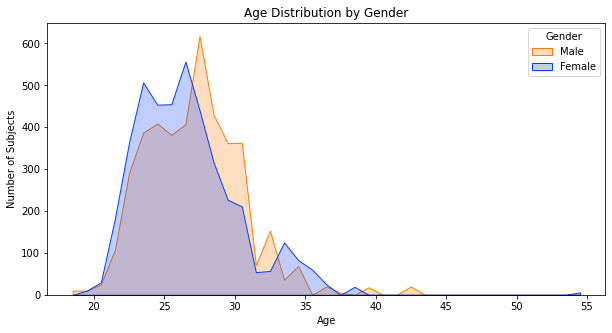

In [26]:
#Age Distribution by gender
plt.figure(figsize=(10, 5))
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
#plt.xlim(32, 38)
plt.ylabel("Number of Subjects")
sns.histplot(data=dataset, x='age', hue='gender_str', binwidth=1, kde=False, element='poly')
legend = plt.legend(['Male', 'Female'])
legend.set_title('Gender')

**Observation 2**    
In young adulthood, a higher proportion of female participants were aged 20-27 than males. This pattern was repeated for middle age females (34–37 years). However, a higher proportion of male participants were aged (28-33 years) compared to females.

### Goal Distribution  
What is the primary goal of subjects in participating in Speed Dating

In [27]:
#checking for missing values
# we will not remove missing data for this variable, we will just consider it as no data
dataset.isna().sum()['goal']

79

In [28]:
# unique values of goal variable
np.sort(dataset['goal'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6., nan])

In [29]:
sns.color_palette()

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [30]:
dataset['goal'].value_counts()

1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
4.0     301
Name: goal, dtype: int64

In [31]:
# change the goal variables to include string instead of integers while keeping missing data as no data
dataset['goal'] = dataset.goal.apply(lambda x: 
                                     "fun night out" if x == 1
                                     else "meet new people" if x == 2
                                     else "get a date" if x == 3
                                     else "looking for serious relationship" if x == 4
                                     else "to say I dit it" if x == 5
                                     else "other goal" if x == 6
                                     else "no data")

In [32]:
dataset['goal'].unique()

array(['meet new people', 'fun night out', 'other goal', 'get a date',
       'looking for serious relationship', 'no data', 'to say I dit it'],
      dtype=object)

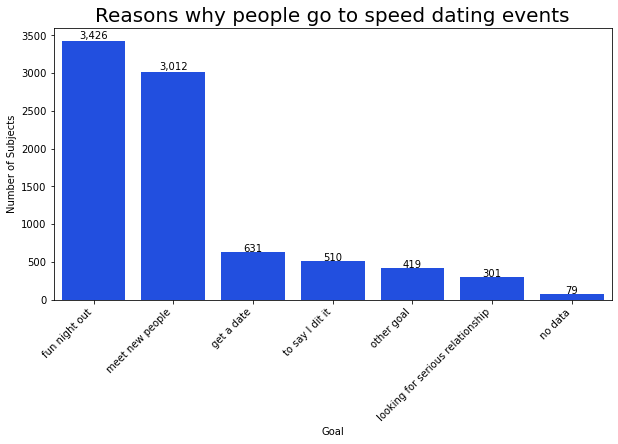

In [119]:
# barchart of reasons for participating in speed dating events
plt.figure(figsize=(10,5))
bar_color = sns.color_palette()[0]

chart = sns.countplot(data = dataset, x='goal',color = bar_color, order = dataset['goal'].value_counts().index)
plt.title("Reasons why people go to speed dating events", fontsize=20)
plt.xlabel("Goal")
plt.ylabel("Number of Subjects")

#as the labels on the axis x are string of important lenght, we should rotate the texts to have clear illustrations
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# add Number of subjects to each bar
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

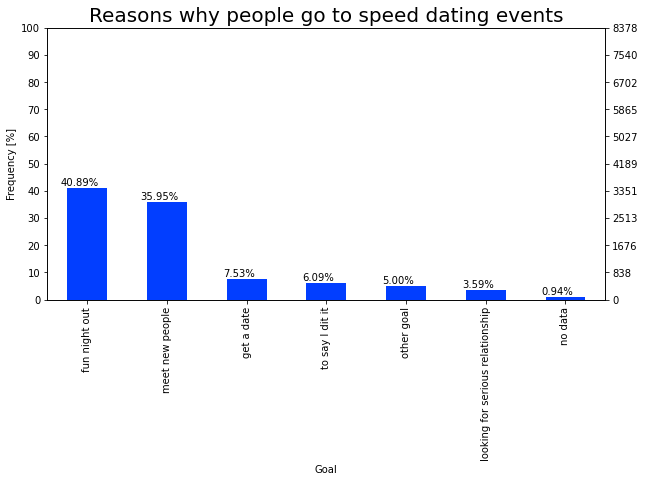

In [34]:
plt.figure(figsize=(10,5))
plt.title("Reasons why people go to speed dating events", fontsize=20)
plt.xlabel('Goal')
plt.ylabel('Frequency [%]')

# show the frequencies
ax = (dataset.goal.value_counts()/len(dataset)*100).plot(kind="bar")
# y axis on the left for the frequency [%]
ax.set_yticks(np.arange(0, 110, 10))

# y axis on the right for the number of subjects
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(dataset)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), ha="center")

    
# pie chart

**observation**  
Most people go to speed dating events to have fun night out (40,89%) or meet new people (35,95%).  
Getting a date is actually the primary goal for only 7,53 % of participants.

In [35]:
# add graph reasons per gender

## Attributes that participants look for in their partners

In [36]:
# extract attributes related data and change the columns lables, all with the subject identifer and his gender
attributes = dataset[['iid','gender_str','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
attributes.columns = ['id', 'gender','attractive', 'sincere','intelligent','fun','ambitious','shared_interests'] 

# drop redundant data
attributes.drop_duplicates(subset=['id']).head()

,id,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests
0,1,Female,15.0,20.0,20.0,15.0,15.0,15.0
10,2,Female,45.0,5.0,25.0,20.0,0.0,5.0
20,3,Female,35.0,10.0,35.0,10.0,10.0,0.0
30,4,Female,20.0,20.0,20.0,20.0,10.0,10.0
40,5,Female,20.0,5.0,25.0,25.0,10.0,15.0


In [37]:
# add a new column to sum up the rates of the different attributes
attributes['sum']= attributes.iloc[:,2:].sum(axis=1)
attributes['sum'].value_counts().sort_index()

0.00        79
90.00       65
95.00       22
99.98       26
99.99       16
99.99       82
99.99      199
100.00      56
100.00    7142
100.00     110
100.01     127
100.01     239
100.02      56
100.02      92
101.00      10
110.00      22
120.00      25
148.00      10
Name: sum, dtype: int64

**Note**:  
1) the sum 0 means that all entries are missing so we will drop those observations  
2) the data is not normalised as different scales are used as mentionned in the data description, hence we should normlize the data in order to get significative results

In [38]:
# drop rows where all attributes were not rated 
index = attributes[attributes['sum']==0].index
attributes.drop(index=index, inplace=True, errors='raise')

In [39]:
## Normalize
##all values will be redistributed and curved to fit 100 total points using the rule x_norm = x /sum * 100
for col in attributes.columns[2:]:
    attributes[col] = round((attributes[col] / attributes['sum'])*100,2)

In [40]:
#del attributes['sum']
attributes

,id,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,sum
0,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
1,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
2,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
3,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
4,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
...,...,...,...,...,...,...,...,...,...
8373,552,Male,70.0,0.0,15.0,15.0,0.0,0.0,100.0
8374,552,Male,70.0,0.0,15.0,15.0,0.0,0.0,100.0
8375,552,Male,70.0,0.0,15.0,15.0,0.0,0.0,100.0
8376,552,Male,70.0,0.0,15.0,15.0,0.0,0.0,100.0


In [41]:
attributes.iloc[:,2:8].mean().sort_values(ascending=False)
#add a graphic

attractive          22.509522
intelligent         20.263096
fun                 17.451919
sincere             17.387194
shared_interests    11.835349
ambitious           10.659928
dtype: float64

In [42]:
attributes['gender'].unique()

array(['Female', 'Male'], dtype=object)

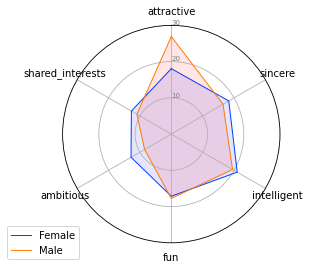

In [43]:
# Radar Chart or spider plot

# 1) data
radar_data = attributes.groupby('gender').mean().iloc[:,1:7]

# 2) Number of variables
categories = list(radar_data.columns)
N = len(categories)

# 3) the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,30)

# add plots
# Female
values=radar_data.loc['Female'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Female")
ax.fill(angles, values, 'b', alpha=0.1)

# Male
values=radar_data.loc['Male'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

## Bivariate Analysis
### Which of the 6 Attributes Actually Influence Decision Making

In [44]:
dataset.isna().sum()['pid']

10

In [45]:
dataset.shape

(8378, 186)

In [46]:
mask = pd.isna(dataset['pid'])==False
data_ev = dataset.loc[mask][['iid','pid', 'dec', 'gender_str','attr', 'sinc','intel','fun','amb','shar', 'like', 'prob']]
data_ev.columns = ['id', 'partner_id', 'decision','gender','attractive', 'sincere','intelligent','fun','ambitious','shared_interests', 'like','probability']
data_ev

,id,partner_id,decision,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,like,probability
0,1,11.0,1,Female,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,12.0,1,Female,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,13.0,1,Female,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,1,14.0,1,Female,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,15.0,1,Female,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,0,Male,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0
8374,552,527.0,0,Male,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0
8375,552,528.0,0,Male,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0
8376,552,529.0,0,Male,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0


In [47]:
# check for missing values

In [48]:
data_ev.isna().sum()['partner_id']

0

In [49]:
data_ev.isna().sum()['attractive']

202

In [50]:
data_ev['attractive'].unique()

array([ 6. ,  7. ,  5. ,  4. ,  8. ,  9. ,  3. , 10. ,  1. ,  nan,  2. ,
        0. ,  6.5,  7.5,  9.5,  8.5,  9.9,  3.5])

In [51]:
'''
the amount of missing data is important, so we cannot do a full na drop, 
but we will drop only the rows where all attributes are not rated
to do that, we will replace, as a first step, all the na values for the 6 attributes by 1000
only rows that add up to 6*1000 will be dropped
second, we will convert back all rates equal to 1000 as na values
'''

'\nthe amount of missing data is important, so we cannot do a full na drop, \nbut we will drop only the rows where all attributes are not rated\nto do that, we will replace, as a first step, all the na values for the 6 attributes by 1000\nonly rows that add up to 6*1000 will be dropped\nsecond, we will convert back all rates equal to 1000 as na values\n'

In [52]:
# replace na values for the 6 attributes by 1000 : fillna / replace
data_ev.iloc[:, 4:10]= data_ev.iloc[:, 4:10].fillna(1000.0)
data_ev

,id,partner_id,decision,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,like,probability
0,1,11.0,1,Female,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,12.0,1,Female,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,13.0,1,Female,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,1,14.0,1,Female,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,15.0,1,Female,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,0,Male,3.0,5.0,5.0,5.0,1000.0,1000.0,2.0,5.0
8374,552,527.0,0,Male,4.0,6.0,8.0,4.0,4.0,1000.0,4.0,4.0
8375,552,528.0,0,Male,4.0,7.0,8.0,8.0,8.0,1000.0,6.0,5.0
8376,552,529.0,0,Male,4.0,6.0,5.0,4.0,1000.0,5.0,5.0,5.0


In [53]:
# add a new column to sum up the rates of the different attributes
data_ev['sum']= data_ev.iloc[:,4:10].sum(axis=1)
data_ev['sum'].value_counts()[6000.0]

192

In [54]:
data_ev['sum'].value_counts()[0.0]

3

In [55]:
# drop rows where all attributes were not rated  (sum == 6000) or sum =0.0 (remember scale in [1,10])
index = data_ev[(data_ev['sum'] == 6000.0) | (data_ev['sum'] == 0.0)].index
data_ev.drop(index=index, inplace=True, errors='raise')
data_ev.shape

(8173, 13)

In [56]:
# convert back 1000 values to na
data_ev.iloc[:, 4:10]= data_ev.iloc[:, 4:10].replace(1000.0, np.nan)
data_ev

,id,partner_id,decision,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,like,probability,sum
0,1,11.0,1,Female,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,40.0
1,1,12.0,1,Female,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,41.0
2,1,13.0,1,Female,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,42.0
3,1,14.0,1,Female,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,42.0
4,1,15.0,1,Female,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,0,Male,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,2018.0
8374,552,527.0,0,Male,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,1026.0
8375,552,528.0,0,Male,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,1035.0
8376,552,529.0,0,Male,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,1024.0


In [57]:
# recompute the sum while skipping nan values
data_ev['sum']= data_ev.iloc[:,4:10].sum(axis=1, skipna=True)
data_ev

,id,partner_id,decision,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,like,probability,sum
0,1,11.0,1,Female,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,40.0
1,1,12.0,1,Female,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,41.0
2,1,13.0,1,Female,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,42.0
3,1,14.0,1,Female,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,42.0
4,1,15.0,1,Female,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,0,Male,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,18.0
8374,552,527.0,0,Male,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,26.0
8375,552,528.0,0,Male,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,35.0
8376,552,529.0,0,Male,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,24.0


In [58]:
data_ev['sum'].value_counts()

36.0    404
40.0    400
41.0    398
42.0    389
38.0    373
37.0    372
39.0    370
43.0    358
44.0    319
45.0    314
34.0    299
35.0    297
30.0    267
33.0    254
32.0    253
46.0    251
48.0    237
31.0    234
47.0    223
29.0    176
28.0    171
50.0    165
49.0    154
27.0    134
26.0    116
51.0    103
52.0     99
24.0     98
25.0     93
23.0     90
54.0     76
60.0     73
53.0     69
22.0     64
21.0     57
55.0     46
20.0     42
18.0     37
19.0     34
16.0     26
58.0     24
15.0     23
57.0     23
56.0     21
17.0     19
13.0     16
6.0      16
59.0     16
12.0     15
14.0     13
11.0     10
10.0      9
7.0       5
9.0       5
4.0       2
53.5      2
43.5      2
46.5      2
5.0       2
35.5      1
8.0       1
1.0       1
2.0       1
31.5      1
45.5      1
44.5      1
29.5      1
49.5      1
13.5      1
50.9      1
28.5      1
52.5      1
Name: sum, dtype: int64

In [59]:
# Finally, it is important to realize that the attributes are evaluated for the opposite gender.
# add partner gender
data_ev['partner_gender'] = np.where(data_ev['gender'] == 'Female', 'Male', 'Female')

In [60]:
graph_data = data_ev.groupby(['partner_id', 'partner_gender']).mean().iloc[:, 1:8]
graph_data.head()

,,decision,attractive,sincere,intelligent,fun,ambitious,shared_interests
partner_id,partner_gender,,,,,,,
1.0,Female,0.5,6.7,7.4,8.0,7.2,8.000000,7.1
2.0,Female,0.6,7.7,7.1,7.9,7.5,7.500000,6.5
3.0,Female,0.5,6.5,7.1,7.3,6.2,7.111111,6.0
4.0,Female,0.6,7.0,7.1,7.7,7.5,7.700000,7.2
5.0,Female,0.3,5.3,7.7,7.6,7.2,7.800000,6.2


In [61]:
graph_data_1 = graph_data[graph_data['attractive'].notnull()][['decision', 'attractive']]
graph_data_2 = graph_data[graph_data['sincere'].notnull()][['decision', 'sincere']]
graph_data_3 = graph_data[graph_data['intelligent'].notnull()][['decision', 'intelligent']]
graph_data_4 = graph_data[graph_data['fun'].notnull()][['decision', 'fun']]
graph_data_5 = graph_data[graph_data['ambitious'].notnull()][['decision', 'ambitious']]
graph_data_6 = graph_data[graph_data['shared_interests'].notnull()][['decision', 'shared_interests']]

In [146]:
graph_data_1.head()
# the female subject (partner_id == 1.0) as a partner had 50% of yes(s) and rated as attractive at 6.7 (from 1-10)
#question: is the percentage of yes(s) he got related to his attractivness attribue

,,decision,attractive
partner_id,partner_gender,,
1.0,Female,0.5,6.7
2.0,Female,0.6,7.7
3.0,Female,0.5,6.5
4.0,Female,0.6,7.0
5.0,Female,0.3,5.3


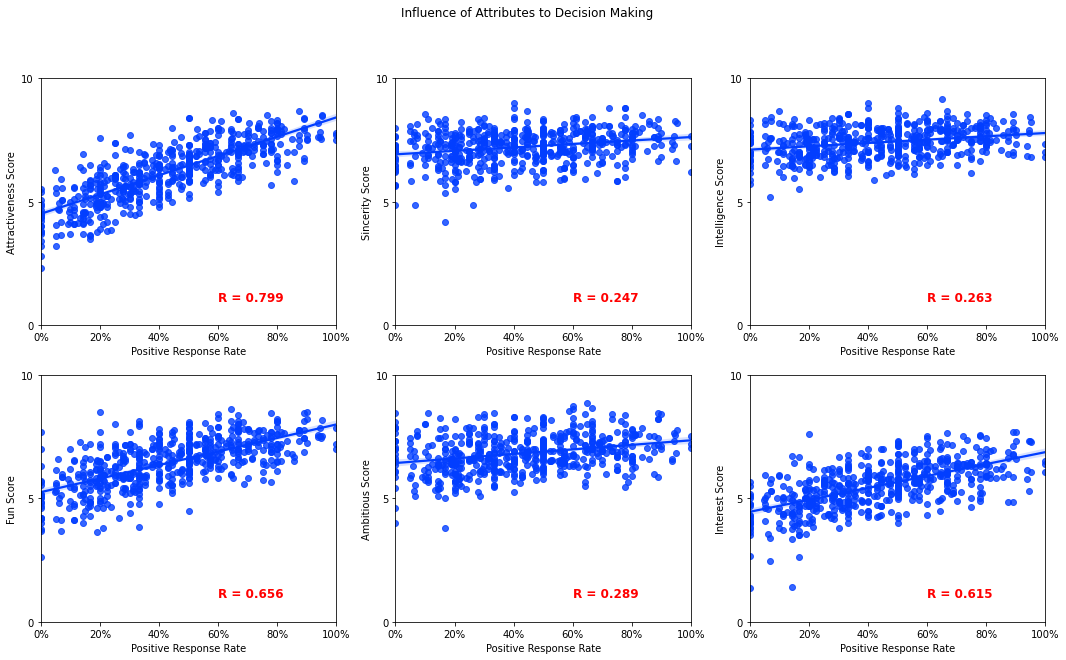

In [169]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Influence of Attributes to Decision Making')

# list for R_scores
l_R=[]
#################### attractive
sns.regplot(ax=axes[0, 0], data = graph_data_1, x='decision', y='attractive')
axes[0, 0].set_xlabel('Positive Response Rate')
axes[0, 0].set_ylabel('Attractiveness Score')
axes[0, 0].set_ylim(0,10)
axes[0, 0].set_yticks([0, 5, 10])
axes[0, 0].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
#compute  Pearson Product-Moment Correlation Coefficient (R score)
r1= round(np.corrcoef(graph_data_1['decision'], graph_data_1['attractive'])[0,1],3)
axes[0, 0].text(0.6, 1, f'R = {r1}', fontweight='bold', color='red',fontsize=12)
l_R.append(['attractive',r1])

#################### sincere
sns.regplot(ax=axes[0, 1], data = graph_data_2, x='decision', y='sincere')
axes[0, 1].set_xlabel('Positive Response Rate')
axes[0, 1].set_ylabel('Sincerity Score')
axes[0, 1].set_ylim(0,10)
axes[0, 1].set_yticks([0, 5, 10])
axes[0, 1].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r2= round(np.corrcoef(graph_data_2['decision'], graph_data_2['sincere'])[0,1],3)
axes[0, 1].text(0.6, 1, f'R = {r2}', fontweight='bold', color='red',fontsize=12)
l_R.append(['sincere',r2])

#################### intelligent
sns.regplot(ax=axes[0, 2], data = graph_data_3, x='decision', y='intelligent')
axes[0, 2].set_xlabel('Positive Response Rate')
axes[0, 2].set_ylabel('Intelligence Score')
axes[0, 2].set_ylim(0,10)
axes[0, 2].set_yticks([0, 5, 10])
axes[0, 2].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r3= round(np.corrcoef(graph_data_3['decision'], graph_data_3['intelligent'])[0,1],3)
axes[0, 2].text(0.6, 1, f'R = {r3}', fontweight='bold', color='red',fontsize=12)
l_R.append(['intelligent',r3])

######################## Fun
sns.regplot(ax=axes[1, 0], data = graph_data_4, x='decision', y='fun')
axes[1, 0].set_xlabel('Positive Response Rate')
axes[1, 0].set_ylabel('Fun Score')
axes[1, 0].set_ylim(0,10)
axes[1, 0].set_yticks([0, 5, 10])
axes[1, 0].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r4= round(np.corrcoef(graph_data_4['decision'], graph_data_4['fun'])[0,1],3)
axes[1, 0].text(0.6, 1, f'R = {r4}', fontweight='bold', color='red',fontsize=12)
l_R.append(['fun',r4])

######################## ambitious
sns.regplot(ax=axes[1, 1], data = graph_data_5, x='decision', y='ambitious')
axes[1, 1].set_xlabel('Positive Response Rate')
axes[1, 1].set_ylabel('Ambitious Score')
axes[1, 1].set_ylim(0,10)
axes[1, 1].set_yticks([0, 5, 10])
axes[1, 1].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r5= round(np.corrcoef(graph_data_5['decision'], graph_data_5['ambitious'])[0,1],3)
axes[1, 1].text(0.6, 1, f'R = {r5}', fontweight='bold', color='red',fontsize=12)
l_R.append(['ambitious',r5])

############### shared interests
sns.regplot(ax=axes[1, 2], data = graph_data_6, x='decision', y='shared_interests')
axes[1, 2].set_xlabel('Positive Response Rate')
axes[1, 2].set_ylabel('Interest Score')
axes[1, 2].set_ylim(0,10)
axes[1, 2].set_yticks([0, 5, 10])
axes[1, 2].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r6= round(np.corrcoef(graph_data_6['decision'], graph_data_6['shared_interests'])[0,1],3)
axes[1, 2].text(0.6, 1, f'R = {r6}', fontweight='bold', color='red',fontsize=12)
l_R.append(['shared_interests',r6])

Text(0, 0.5, '')

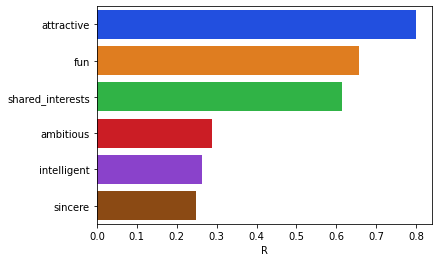

In [170]:
df_R = pd.DataFrame(l_R, columns=['attribute', 'R'])
ax = sns.barplot(y='attribute', x="R", data=df_R, order = df_R.sort_values('R', ascending = False).attribute)
ax.set_ylabel('')

In [171]:
# attractiveness per gender
mask = (data_ev['attractive'].notnull()) & (data_ev['partner_gender'] == 'Male')
corr_data_1m = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'attractive']]
r1m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['attractive'])[0,1],3)

mask = (data_ev['attractive'].notnull()) & (data_ev['partner_gender'] == 'Female')
corr_data_1f = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'attractive']]
r1f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['attractive'])[0,1],3)
r1f

# sincere per gender
mask = (data_ev['sincere'].notnull()) & (data_ev['partner_gender'] == 'Male')
corr_data_1m = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'sincere']]
r2m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['sincere'])[0,1],3)

mask = (data_ev['sincere'].notnull()) & (data_ev['partner_gender'] == 'Female')
corr_data_1f = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'sincere']]
r2f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['sincere'])[0,1],3)

# intelligent per gender
mask = (data_ev['intelligent'].notnull()) & (data_ev['partner_gender'] == 'Male')
corr_data_1m = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'intelligent']]
r3m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['intelligent'])[0,1],3)

mask = (data_ev['intelligent'].notnull()) & (data_ev['partner_gender'] == 'Female')
corr_data_1f = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'intelligent']]
r3f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['intelligent'])[0,1],3)

# fun per gender
mask = (data_ev['fun'].notnull()) & (data_ev['partner_gender'] == 'Male')
corr_data_1m = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'fun']]
r4m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['fun'])[0,1],3)

mask = (data_ev['fun'].notnull()) & (data_ev['partner_gender'] == 'Female')
corr_data_1f = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'fun']]
r4f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['fun'])[0,1],3)

# ambitious  per gender
mask = (data_ev['ambitious'].notnull()) & (data_ev['partner_gender'] == 'Male')
corr_data_1m = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'ambitious']]
r5m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['ambitious'])[0,1],3)

mask = (data_ev['ambitious'].notnull()) & (data_ev['partner_gender'] == 'Female')
corr_data_1f = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'ambitious']]
r5f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['ambitious'])[0,1],3)

# shared interests per gender
mask = (data_ev['fun'].notnull()) & (data_ev['partner_gender'] == 'Male')
corr_data_1m = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'fun']]
r6m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['fun'])[0,1],3)

mask = (data_ev['shared_interests'].notnull()) & (data_ev['partner_gender'] == 'Female')
corr_data_1f = data_ev[mask][['partner_id', 'partner_gender', 'decision', 'shared_interests']]
r6f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['shared_interests'])[0,1],3)


In [ ]:
l =[[r1,r2,r3,r4,r5,r6],[r1m,r2m,r3m,r4m,r5m,r6m],[r1f,r2f,r3f,r4f,r5f,r6f]]

In [174]:
d={'R_value': [r1,r2,r3,r4,r5,r6,r1m,r2m,r3m,r4m,r5m,r6m,r1f,r2f,r3f,r4f,r5f,r6f],
   'Type':['AVG','AVG','AVG','AVG','AVG','AVG', 'M','M','M','M','M','M', 'F', 'F', 'F', 'F', 'F', 'F'],
   'Attribute':['attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests','attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests','attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests']    
}

corr_graph = pd.DataFrame(d)
corr_graph

,R_value,Type,Attribute
0,0.799,AVG,attractive
1,0.247,AVG,sincere
2,0.263,AVG,intelligent
3,0.656,AVG,fun
4,0.289,AVG,ambitious
5,0.615,AVG,shared_interests
6,0.445,M,attractive
7,0.222,M,sincere
8,0.232,M,intelligent
9,0.416,M,fun


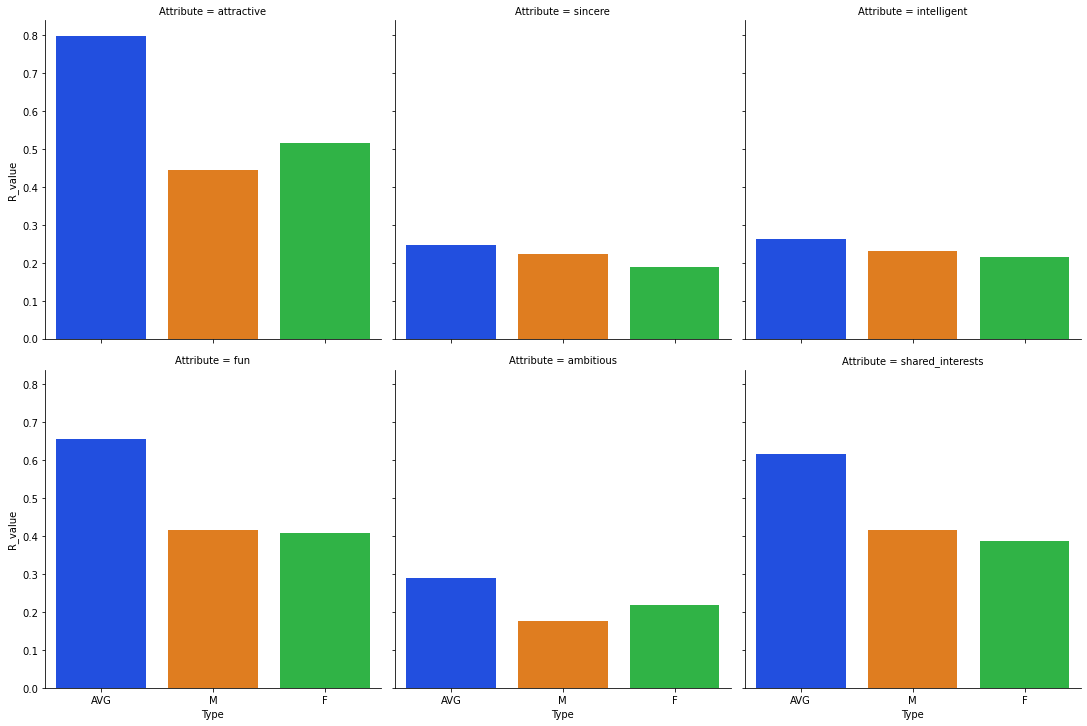

In [179]:
sns.catplot(x="Type", y="R_value", kind="bar", data=corr_graph, col = 'Attribute',  col_wrap=3)